In [1]:
import numpy as np

In [2]:
import yt

In [3]:
import nibabel as nib

In [64]:
# creates interactive plots of nii files
import niwidgets 

In [4]:
img = nib.load('Dallas/sub04288/anat/mprage_skullstripped.nii.gz')

In [5]:
img_data = img.get_fdata()

In [6]:
list(img.file_map)

['image']

In [7]:
img_data.shape

(160, 256, 256)

In [8]:
print(type(img_data))

<class 'numpy.ndarray'>


In [9]:
img_data.__class__

numpy.ndarray

In [10]:
img_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
rest = nib.load('Dallas/sub04288/func/rest.nii.gz')

In [12]:
rest_data = rest.get_fdata()

In [13]:
list(rest.file_map)

['image']

In [14]:
rest_data.shape

(64, 64, 36, 115)

In [15]:
rest_data

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [16]:
rest_data.__class__

numpy.ndarray

In [17]:
import matplotlib.pyplot as plt

In [18]:
import ipywidgets

#### Plotting Nibabel file with Matplotlib

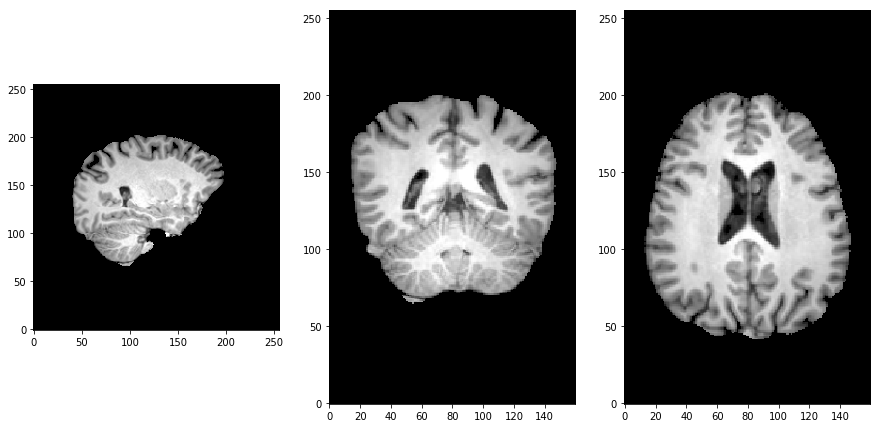

In [19]:
# using anatomy data

def show_slices(slices):
    #Function to display row of image slices
    fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower", cmap="gray")

slice_0 = img_data[55, :, :]
slice_1 = img_data[:, 95, :]
slice_2 = img_data[:, :, 160]
show_slices([slice_0, slice_1, slice_2])

# Showing slices at all three axes

In [20]:
## how to get slider to work with all three subplots??

islider = ipywidgets.IntSlider(min= 0, max = 150, step =1)
def update_slider(event):
    first_index = img_data[event['new']]
    findex = first_index.astype(int)
    img_data[findex,:,:]
    
islider.observe(update_slider, "value")

In [21]:
plt.rcParams["figure.dpi"] = 120
@ipywidgets.interact(slices = (0,160))
def make_slice(slices = 80):
    slice_it_up = img_data[slices,:,:]
    plt.imshow(slice_it_up, origin = "upper")

interactive(children=(IntSlider(value=80, description='slices', max=160), Output()), _dom_classes=('widget-int…

In [22]:
plt.rcParams["figure.dpi"] = 120
@ipywidgets.interact(slices = (0,200))
def make_slice(slices = 100):
    slice_it_up = img_data[:,slices,:]
    plt.imshow(slice_it_up, origin = "upper")

interactive(children=(IntSlider(value=100, description='slices', max=200), Output()), _dom_classes=('widget-in…

In [23]:
plt.rcParams["figure.dpi"] = 120
@ipywidgets.interact(slices = (50,210))
def make_slice(slices = 133):
    slice_it_up = img_data[:,:,slices]
    plt.imshow(slice_it_up, origin = "upper")

interactive(children=(IntSlider(value=133, description='slices', max=210, min=50), Output()), _dom_classes=('w…

TypeError: Invalid dimensions for image data

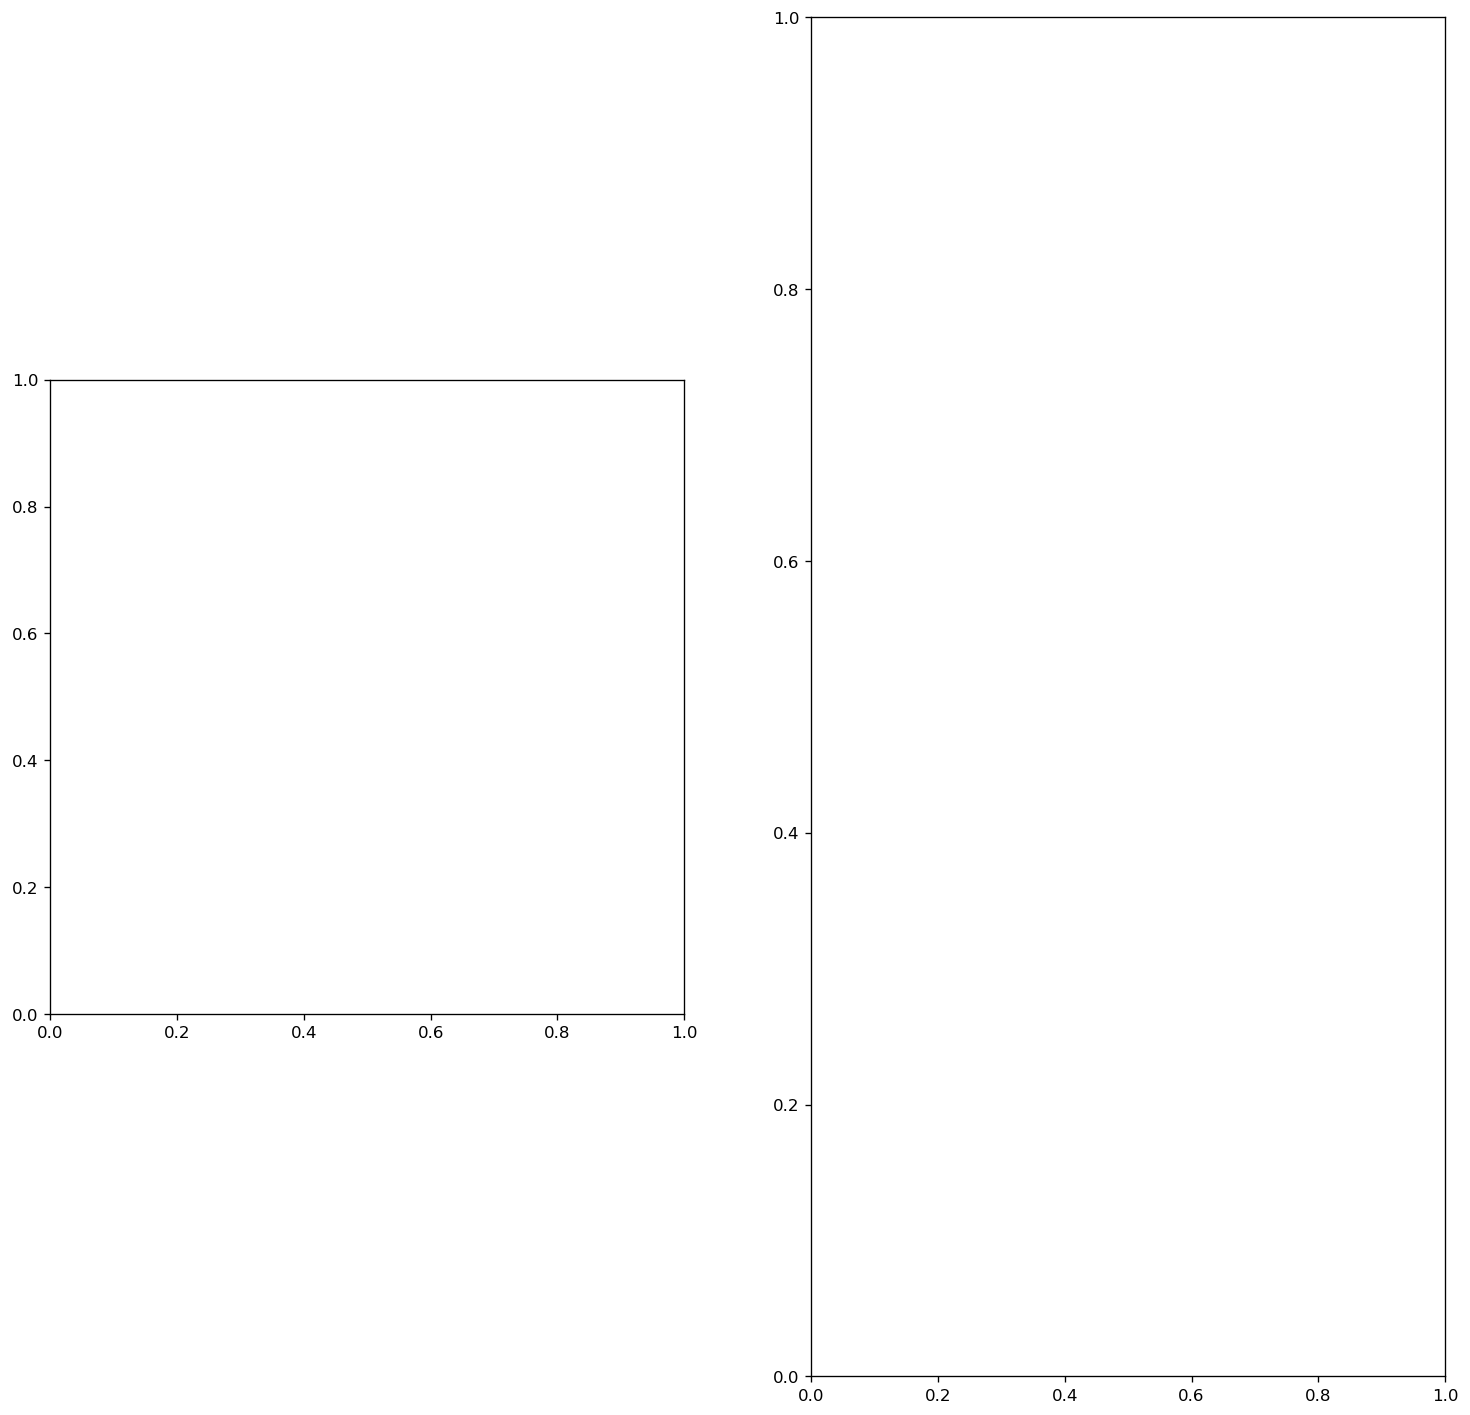

In [24]:
# using func data

def show_slices(slices):
    #Function to display row of image slices
    fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower", cmap="gray")

slice_0 = rest_data[20, :, :, :]
slice_1 = rest_data[:, 30, :, :]
slice_2 = rest_data[:, :, 30, :]
slice_3 = rest_data[:, :, :, 30]
show_slices([slice_0, slice_1])
             
             #slice_1, slice_2, slice_3])

# Showing slices at all three axes

interactive(children=(IntSlider(value=10, description='slices', max=64), Output()), _dom_classes=('widget-inte…

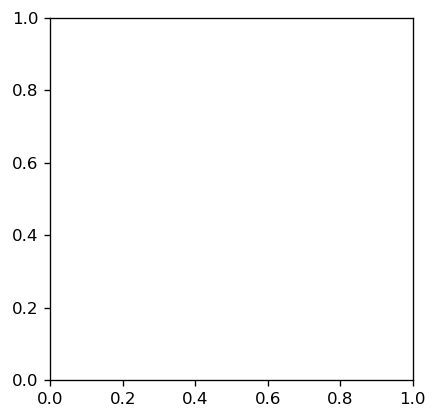

In [25]:
#plt.rcParams["figure.dpi"] = 120
@ipywidgets.interact(slices = (0,64))
def make_slice(slices = 10):
    slice_it_up = rest_data[slices, :, :, :]
    plt.imshow(slice_it_up, origin = "upper")

In [26]:
# Getting the coordinates for each of the three axes

n_i, n_j, n_k = img_data.shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
center_i, center_j, center_k

(79, 127, 127)

In [27]:
# Getting the center vox value

center_vox_value = img_data[center_i, center_j, center_k]
center_vox_value

1690.0

In [28]:
np.set_printoptions(precision=2, suppress=True)

In [29]:
img.affine

array([[  -1.  ,   -0.  ,   -0.  ,   74.53],
       [  -0.  ,    1.  ,   -0.  , -119.53],
       [   0.  ,    0.  ,    1.  , -119.53],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [30]:
header = img.header

In [31]:
header.__class__

nibabel.nifti1.Nifti1Header

In [32]:
header.get_xyzt_units()

('mm', 'unknown')

In [33]:
print(header.get_sform())

[[  -1.     -0.     -0.     74.53]
 [  -0.      1.     -0.   -119.53]
 [   0.      0.      1.   -119.53]
 [   0.      0.      0.      1.  ]]


In [34]:
#only valid if not zero

print(header['sform_code'])

1


In [35]:
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 160 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 74.53125
qoffset_y       : -119.5313
qoffset_z       : -119.5313
srow_x          : [-1.   -0.  

#### Plotting Nibabel file with yt

In [36]:
ds = yt.load_uniform_grid({'image':img_data},[160, 256, 256], length_unit = yt.units.mm)

yt : [INFO     ] 2018-12-04 12:05:30,856 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-12-04 12:05:30,858 Parameters: domain_dimensions         = [160 256 256]
yt : [INFO     ] 2018-12-04 12:05:30,861 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-12-04 12:05:30,866 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-12-04 12:05:30,868 Parameters: cosmological_simulation   = 0.0


In [37]:
print(ds)

UniformGridData


In [38]:
ds.__class__

yt.frontends.stream.data_structures.StreamDataset

In [39]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	      10485760	           219
----------------------------------------------
   	     1	      10485760


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 2.025e-28 Mpc
	Width: 2.025e-22 pc
	Width: 4.178e-17 AU
	Width: 6.250e-04 cm


In [40]:
yt.fields

<module 'yt.fields' from '/anaconda3/lib/python3.6/site-packages/yt/fields/__init__.py'>

In [41]:
ds.field_list

[('stream', 'image')]

In [42]:
ds.derived_field_list

[('gas', 'cell_volume'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dz'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'vertex_x'),
 ('gas', 'vertex_y'),
 ('gas', 'vertex_z'),
 ('gas', 'x'),
 ('gas', 'y'),
 ('gas', 'z'),
 ('index', 'cell_volume'),
 ('index', 'cylindrical_r'),
 ('index', 'cylindrical_radius'),
 ('index', 'cylindrical_theta'),
 ('index', 'cylindrical_z'),
 ('index', 'disk_angle'),
 ('index', 'dx'),
 ('index', 'dy'),
 ('index', 'dz'),
 ('index', 'grid_indices'),
 ('index', 'grid_level'),
 ('index', 'height'),
 ('index', 'morton_index'),
 ('index', 'ones'),
 ('index', 'ones_over_dx'),
 ('index', 'path_element_x'),
 ('index', 'path_element_y'),
 ('index', 'path_element_z'),
 ('index', 'radius'),
 ('index', 'spherical_phi'),
 ('index', 'spherical_r'),
 ('index', 'spherical_radius'),
 ('index', 'spherical_theta'),
 ('index', 'vertex_x'),
 ('index', 'vertex_y'),
 ('index', 'vertex_z'),
 ('index', 'virial_radius_fraction'),
 ('inde

In [43]:
ds.domain_right_edge

YTArray([1., 1., 1.]) code_length

In [44]:
ds.domain_left_edge

YTArray([0., 0., 0.]) code_length

In [45]:
ds.r[:].max("disk_angle")

3.1341935877283826 dimensionless

In [46]:
ds.r[:].max("cell_volume")

9.5367431640625e-08 code_length**3

yt : [INFO     ] 2018-12-04 12:05:49,843 Projection completed
yt : [INFO     ] 2018-12-04 12:05:49,850 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-12-04 12:05:49,851 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-12-04 12:05:49,857 Making a fixed resolution buffer of (('stream', 'image')) 800 by 800



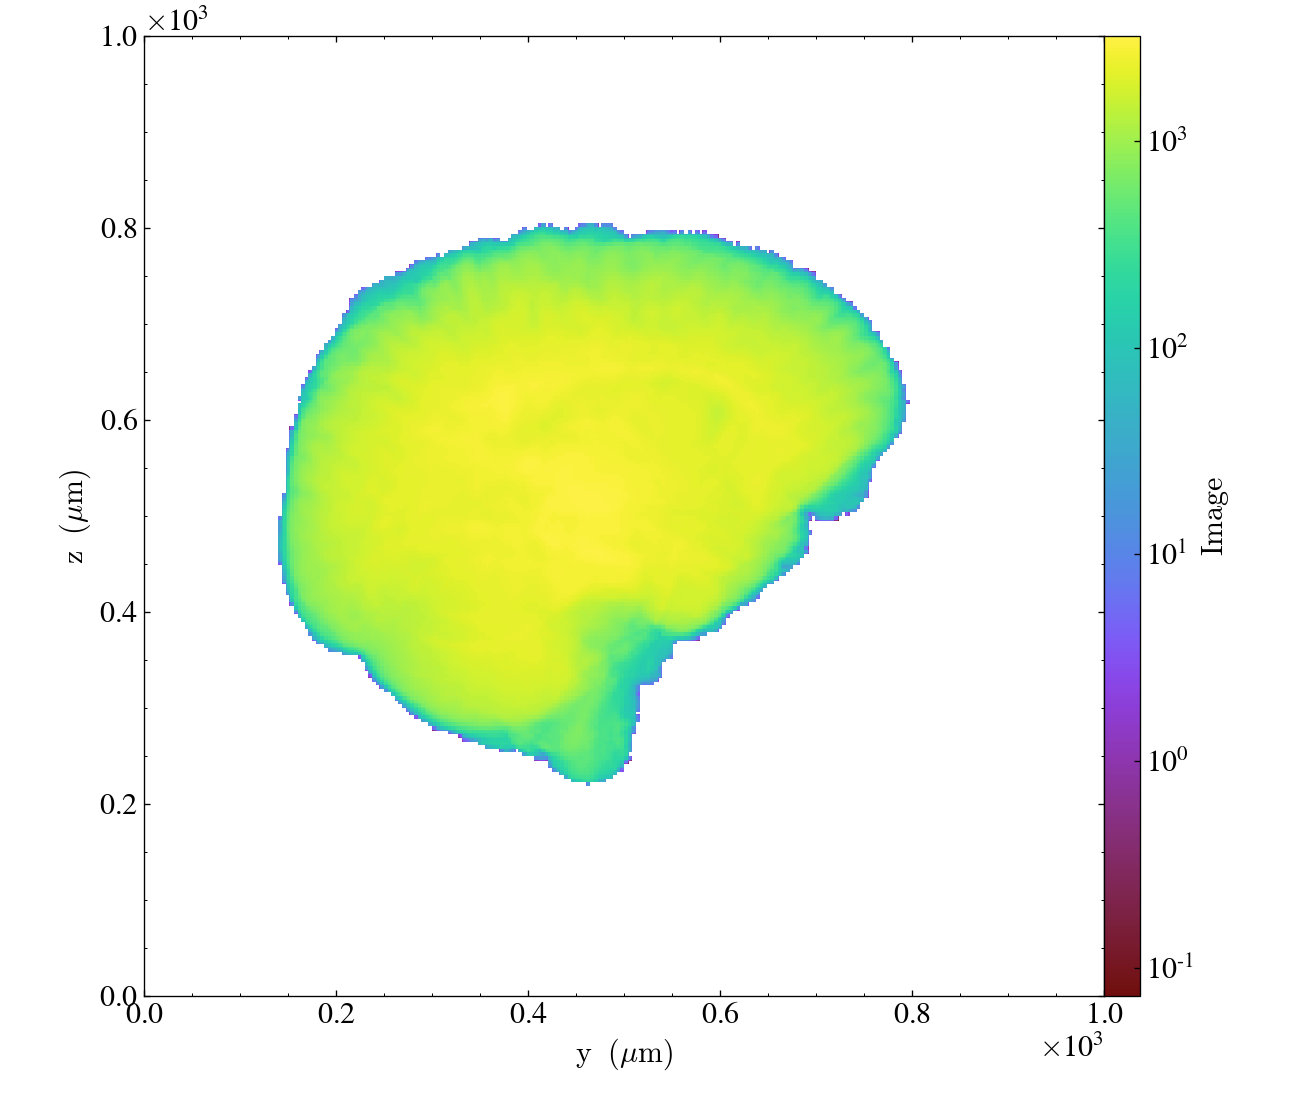


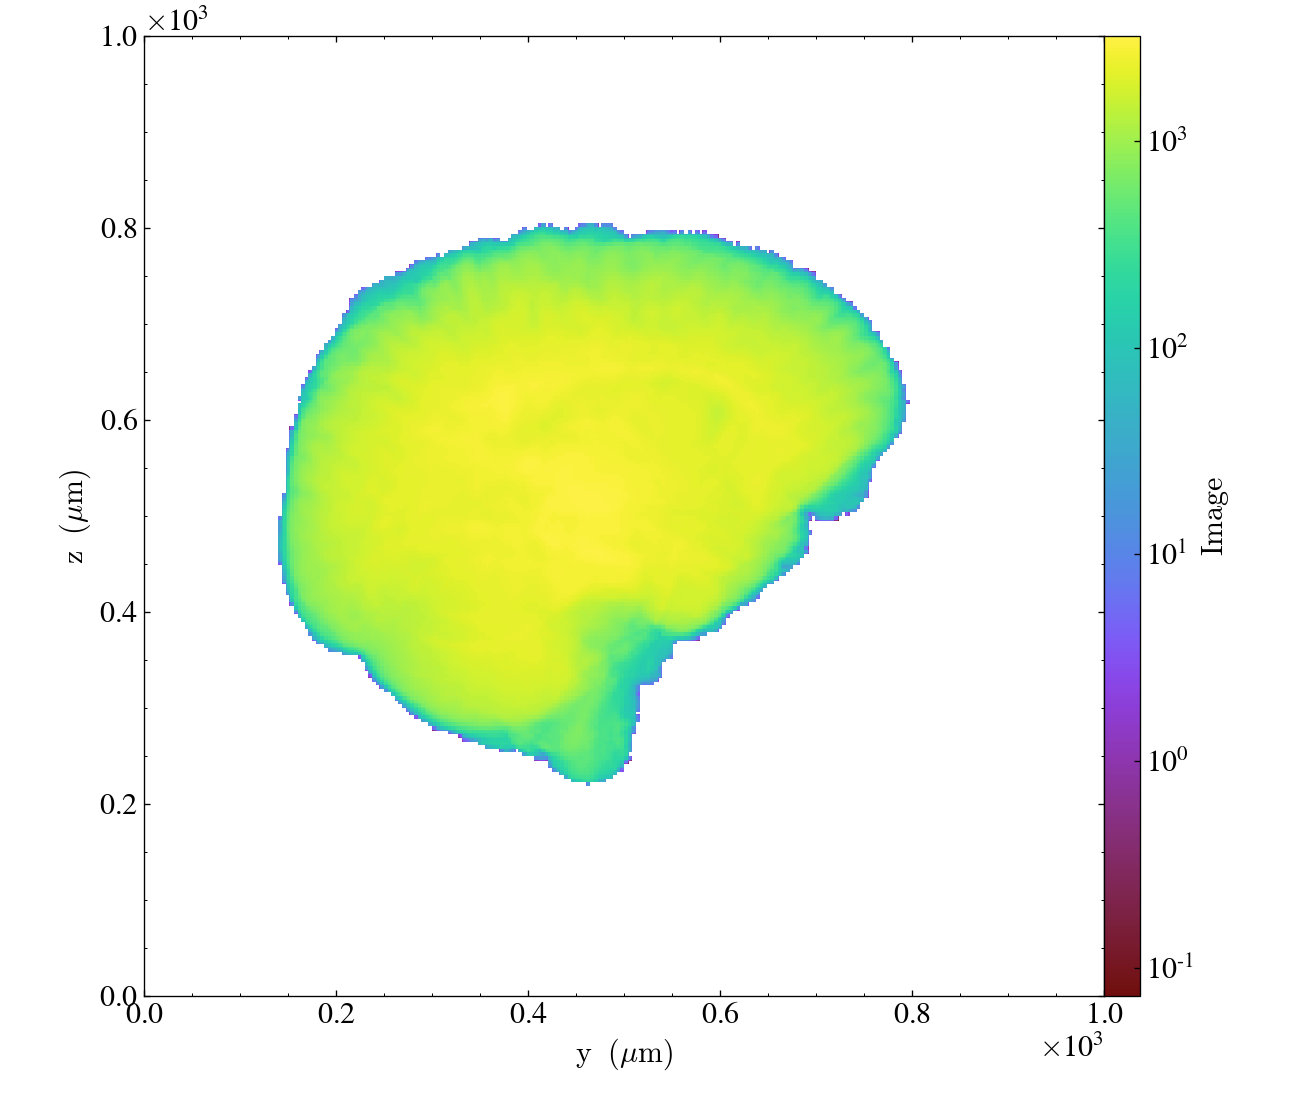

In [47]:
ds.r[:].mean("image", axis="x").plot()

In [48]:
ds.r[:].sum("cell_volume")

0.9999999999999766 code_length**3

In [49]:
slices = 100
ds.r[0,slices,65]

YTPoint (UniformGridData): , p=[ 0.  10.   6.5] cm

In [50]:
@ipywidgets.interact(slices = (0,160))
def make_slice(slices = 100):
    #slice_it_up = ds.r[0,slices,65]
    #normal = ds.r[0,slices,65]
    yt.SlicePlot(ds, normal = [slices, 100, 65], fields ='image')

interactive(children=(IntSlider(value=100, description='slices', max=160), Output()), _dom_classes=('widget-in…

yt : [INFO     ] 2018-12-04 12:05:55,684 xlim = -0.500000 0.500000
yt : [INFO     ] 2018-12-04 12:05:55,686 ylim = -0.500000 0.500000
yt : [INFO     ] 2018-12-04 12:05:55,688 Making a fixed resolution buffer of (('stream', 'image')) 800 by 800



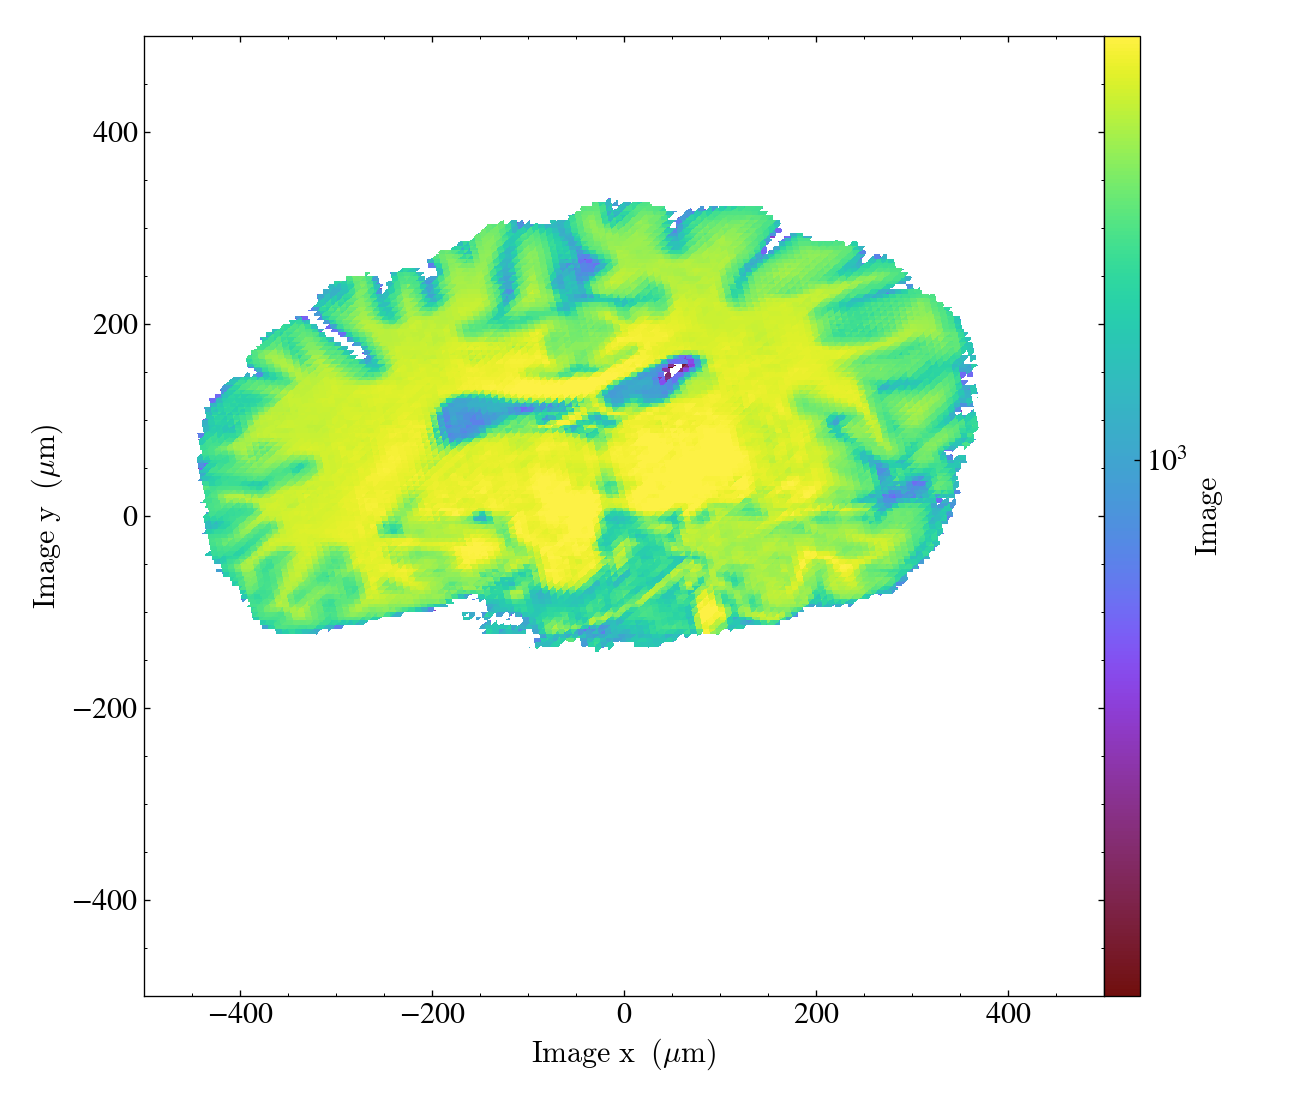

In [51]:
slices = 45
yt.SlicePlot(ds, normal = [slices,100,65], fields ='image')

yt : [INFO     ] 2018-12-04 12:05:57,532 xlim = -0.500000 0.500000
yt : [INFO     ] 2018-12-04 12:05:57,533 ylim = -0.500000 0.500000
yt : [INFO     ] 2018-12-04 12:05:57,535 Making a fixed resolution buffer of (('stream', 'image')) 800 by 800



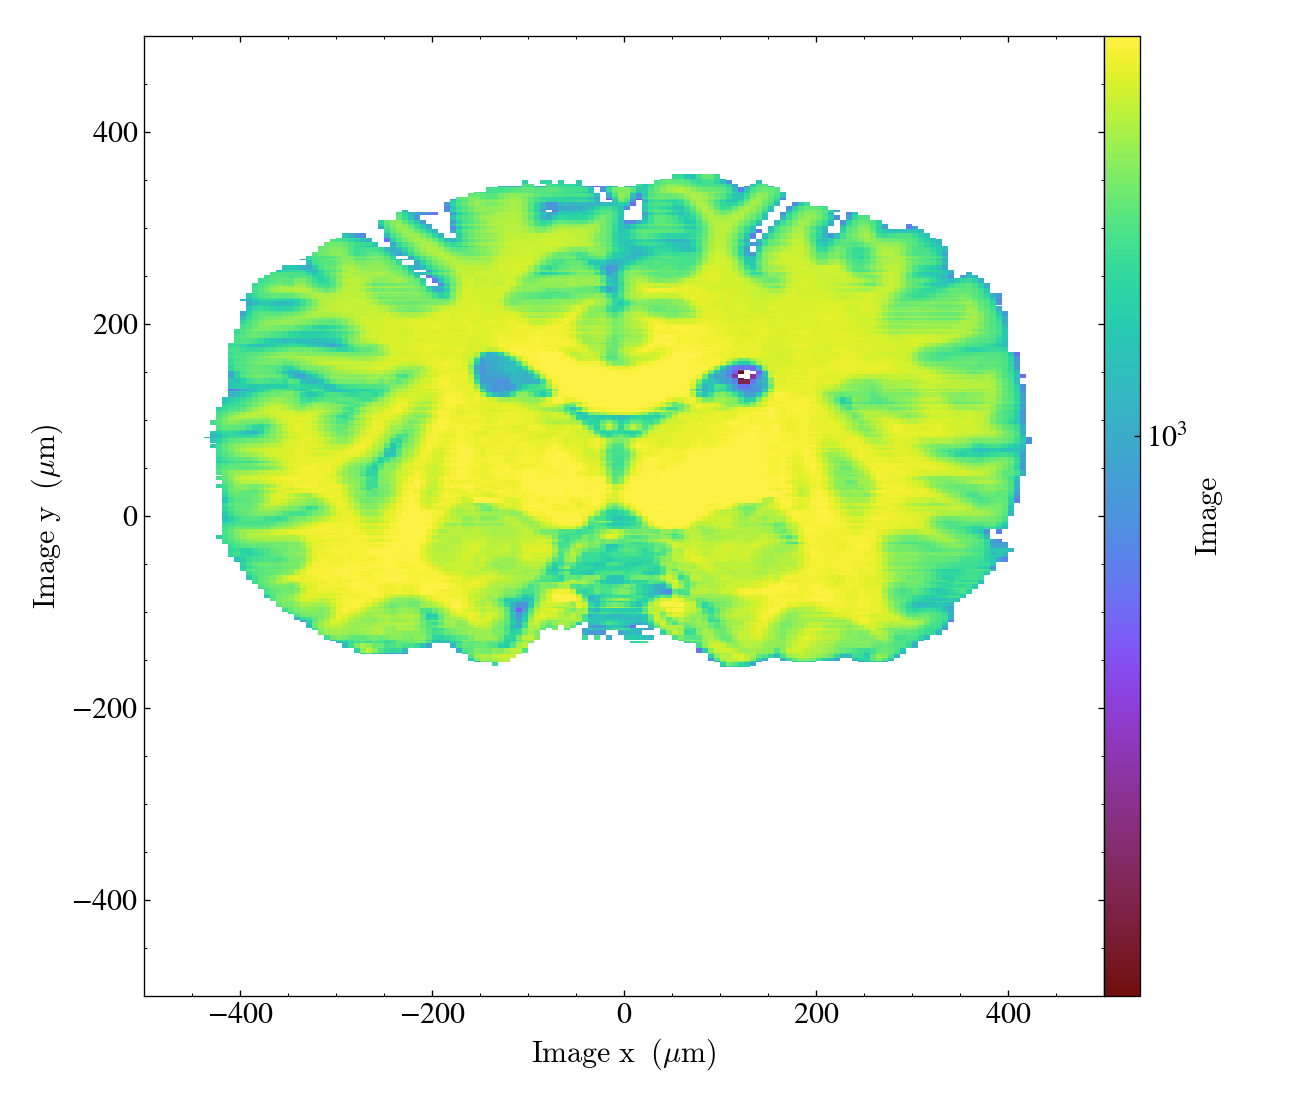

In [52]:
yt.SlicePlot(ds, normal = [0,45,65], fields ='image')

yt : [INFO     ] 2018-12-04 12:06:01,944 Projection completed
yt : [INFO     ] 2018-12-04 12:06:01,945 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-12-04 12:06:01,946 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-12-04 12:06:01,950 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-12-04 12:06:01,952 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-12-04 12:06:01,956 Making a fixed resolution buffer of (('stream', 'image')) 800 by 800



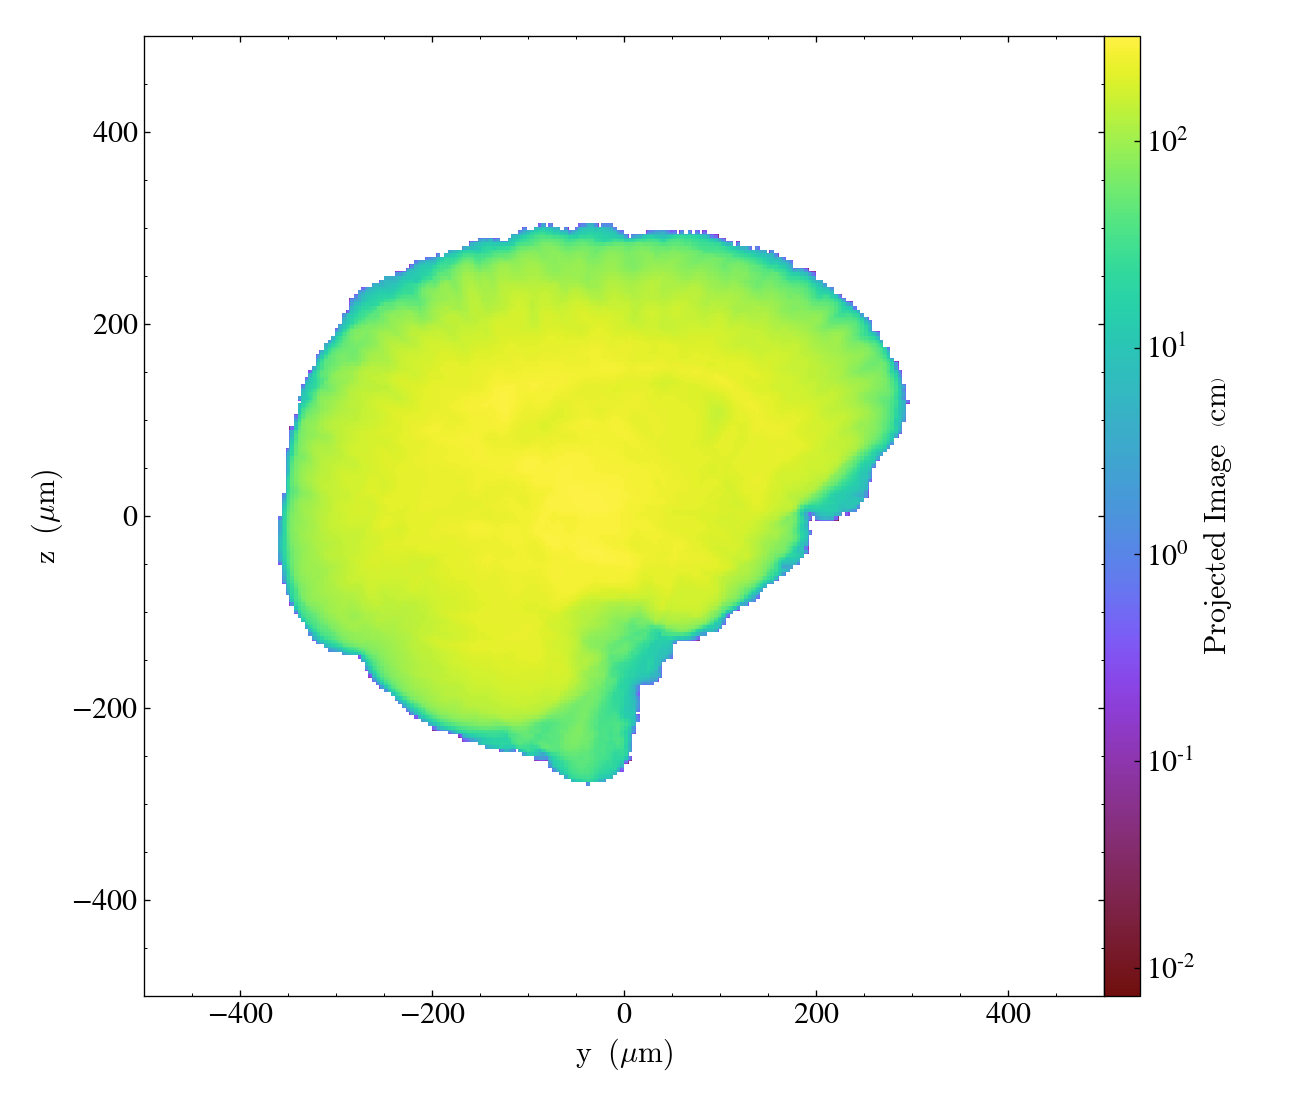

In [53]:
yt.ProjectionPlot(ds, axis = 'x', fields = 'image')

yt : [INFO     ] 2018-12-04 12:06:03,572 xlim = -0.500000 0.500000
yt : [INFO     ] 2018-12-04 12:06:03,573 ylim = -0.500000 0.500000
yt : [INFO     ] 2018-12-04 12:06:03,575 Making a fixed resolution buffer of (('stream', 'image')) 800 by 800



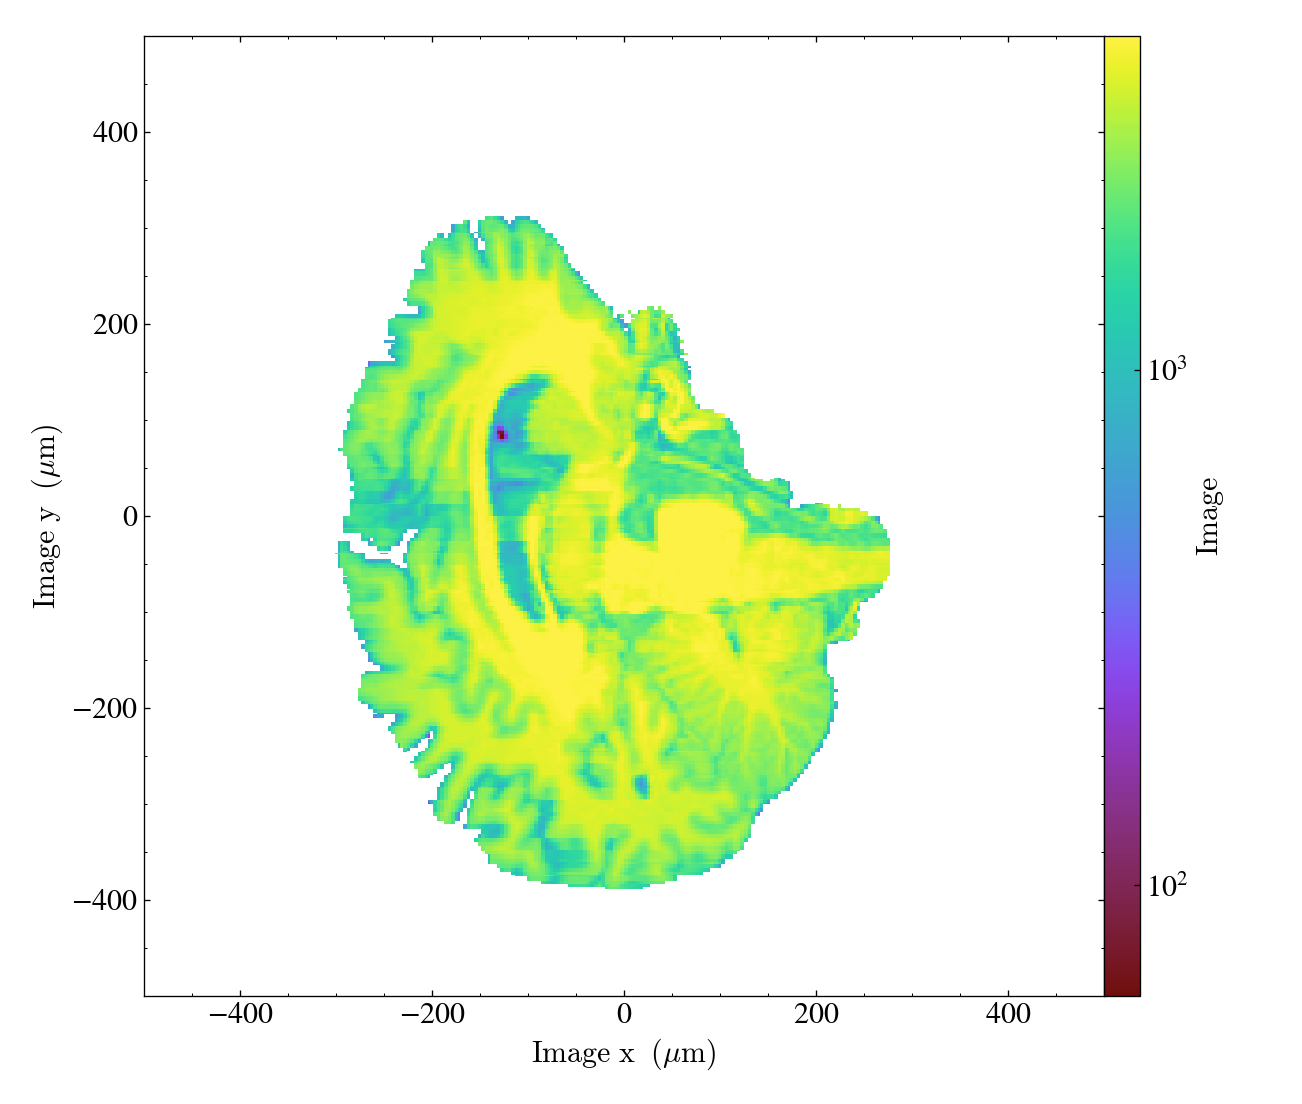

In [54]:
yt.OffAxisSlicePlot(ds,normal = [slices,25,0], fields = 'image')

In [55]:
@ipywidgets.interact(slices = (0,160))
def make_slice(slices = 150):
    yt.OffAxisSlicePlot(ds,normal = [slices,25,0], fields = 'image')

interactive(children=(IntSlider(value=150, description='slices', max=160), Output()), _dom_classes=('widget-in…

In [56]:
yt.ProjectionPlot?

In [57]:
dr = yt.load_uniform_grid({'image':rest_data},[64, 64, 36, 115], length_unit = yt.units.mm)

RuntimeError: 